<a href="https://colab.research.google.com/github/unit9090/Colab_Note/blob/main/py17_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 임포트

In [1]:
import numpy as np          # ndarray
import pandas as pd         # Series, DataFrame
import matplotlib.pyplot as plt     # 시각화(그래프)
import seaborn as sns       # 시각화, 예제 데이터

# tips 데이터셋

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

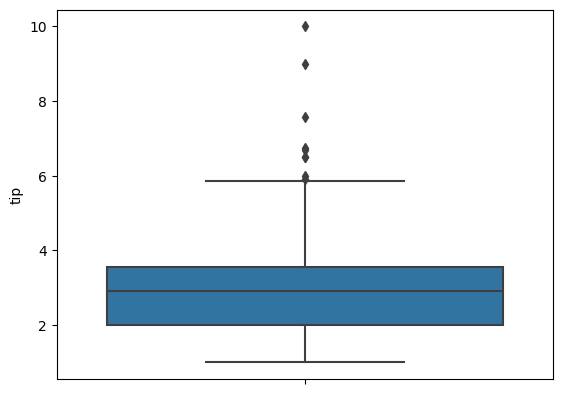

In [5]:
# tip 컬럼의 box plot
sns.boxplot(
    data = tips,
    y = 'tip'
)

plt.show()

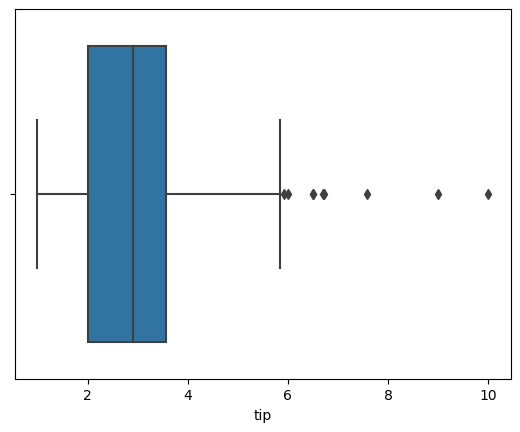

In [6]:
sns.boxplot(
    data = tips,
    x = 'tip'
)

plt.show()

## 그룹(카테고리)별 box plot

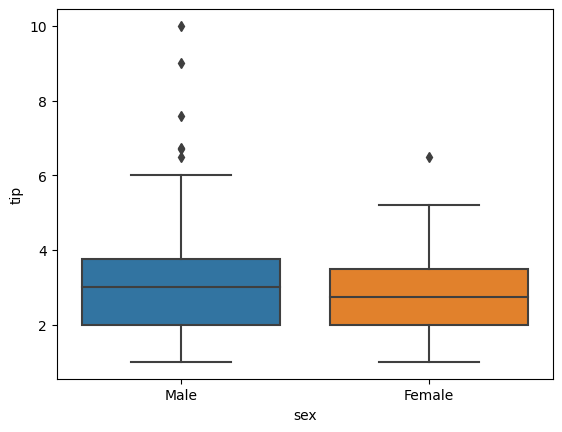

In [8]:
# 성별 tip의 box plot
sns.boxplot(
    data = tips,
    x = 'sex',
    y = 'tip'
)

plt.show()

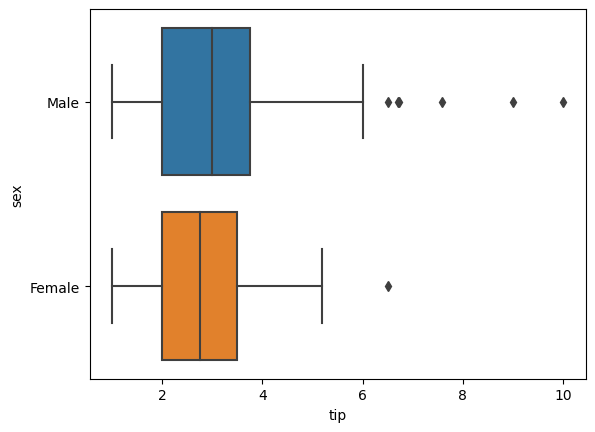

In [11]:
sns.boxplot(
    data = tips,
    x = 'tip',
    y = 'sex'
)

plt.show()

요일별 tip의 box plot

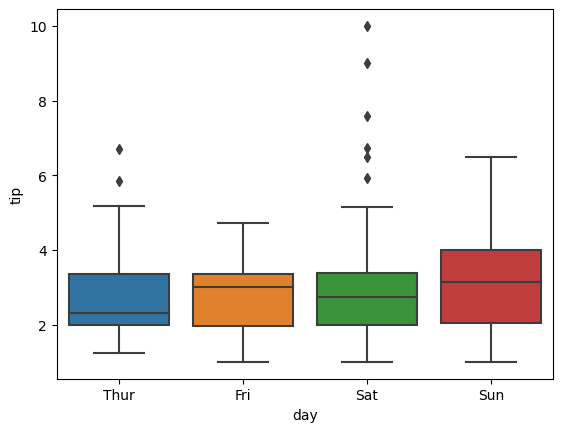

In [13]:
sns.boxplot(
    data = tips,
    x = 'day',
    y = 'tip'
)

plt.show()

* subplot 2개를 생성.
* 각각의 subplot에 흡연여부별 tips의 box plot, 시간별 box plot을 그리세요.

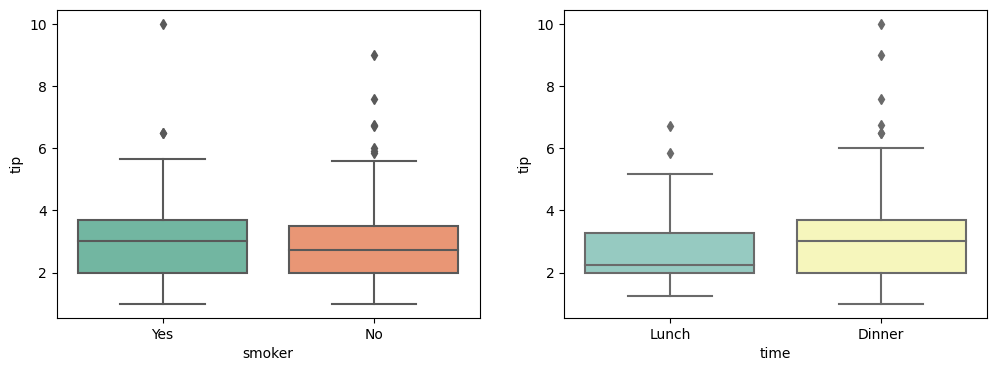

In [37]:
fig, ax = plt.subplots(ncols = 2, figsize = (12, 4))

sns.boxplot(
    data = tips,
    x = 'smoker',
    y = 'tip',
    ax= ax[0],
    palette = 'Set2'
)

sns.boxplot(
    data = tips,
    x = 'time',
    y = 'tip',
    ax= ax[1],
    palette = 'Set3'
)

plt.show()

# 막대 그래프

## `countplot()` 함수

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프.

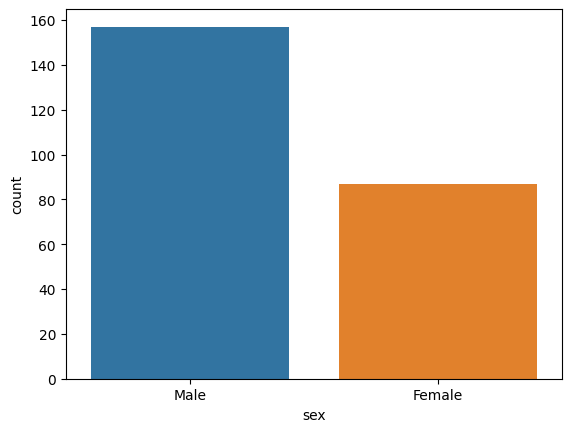

In [48]:
# 성별 빈도수 세로 막대 그래프
# countplot은 y축이 자동으로 선택이 된다.
sns.countplot(
    data = tips,
    x = 'sex'
)

plt.show()

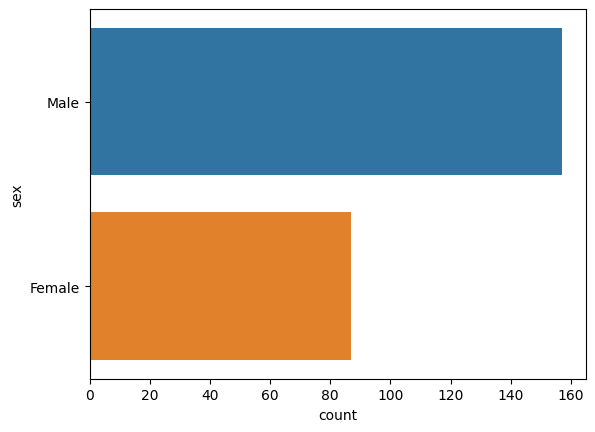

In [42]:
# 성별 빈도수 가로 막대 그래프
sns.countplot(
    data = tips,
    y = 'sex'
)
plt.show()

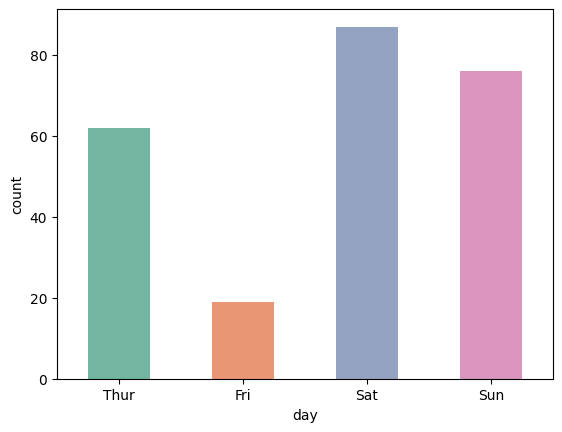

In [46]:
# 요일 빈도수 막대 그래프
sns.countplot(
    data = tips,
    x = 'day',
    palette = 'Set2',
    width = 0.5
)
plt.show()

In [58]:
# 요일별 성별 빈도수
tips.groupby(['day', 'sex']).tip.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

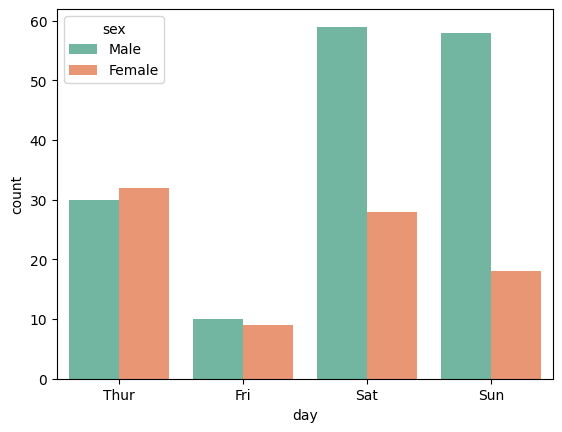

In [62]:
sns.countplot(
    data = tips,
    x = 'day',
    hue = 'sex',
    palette = 'Set2'
)

# hue 파라미터: 그룹(카테고리) 별로 다른 색깔을 설정할 때.

plt.show()

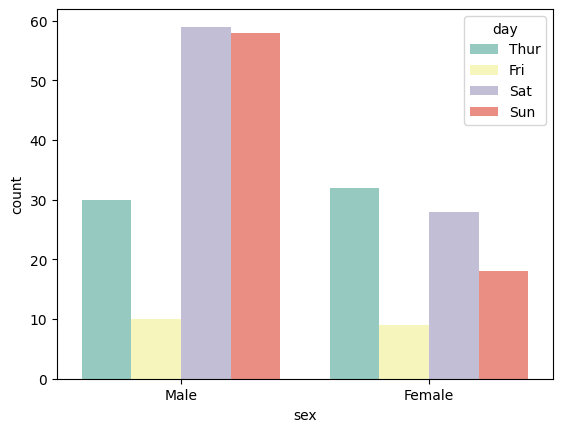

In [61]:
sns.countplot(
    data = tips,
    x = 'sex',
    hue = 'day',
    palette = 'Set3'
)

plt.show()

In [66]:
# 성별, 흡연 여부별 빈도수
tips.groupby(['sex', 'smoker']).tip.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

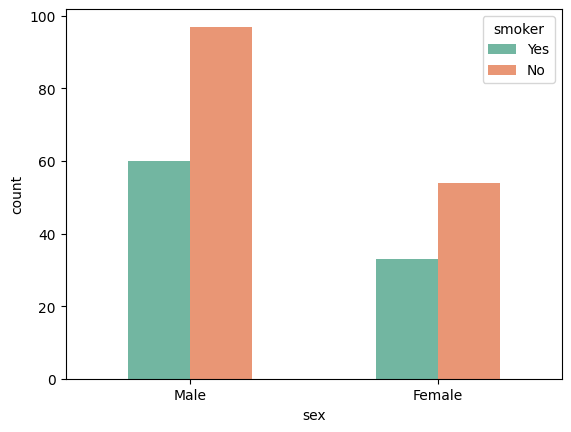

In [69]:
sns.countplot(
    data = tips,
    x = 'sex',
    hue = 'smoker',
    palette = 'Set2',
    width = 0.5
)

plt.show()

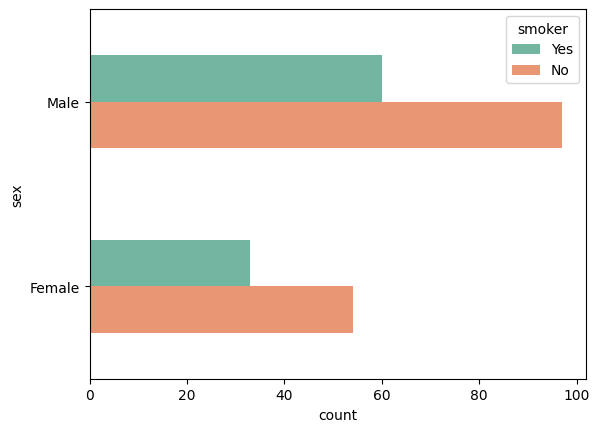

In [70]:
sns.countplot(
    data = tips,
    y = 'sex',
    hue = 'smoker',
    palette = 'Set2',
    width = 0.5
)

plt.show()

## `barplot()` 함수

* 그룹(카테고리) 별로 변수의 통계량(평균, 표준편차, 중앙값, ...)을 막대 그래프로 표현
* 통계량 계산 함수의 기본값은 평균(mean).
* 카테고리 타입 변수와 숫자 타입 변수를 함께 시각화.

In [72]:
# 성별 tip의 평균
tips.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

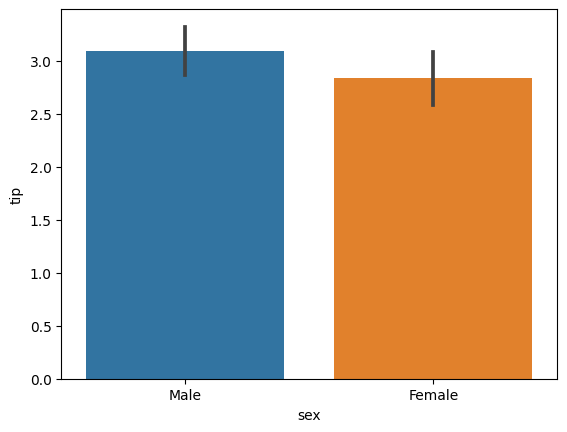

In [80]:
sns.barplot(
    data = tips,
    x = 'sex',
    y = 'tip',
    estimator = np.mean
)

# estimator = 'mean': 기본값, 평균 계산.

plt.show()

In [81]:
# 성별별 tip의 중위값
tips.groupby('sex').tip.median()

sex
Male      3.00
Female    2.75
Name: tip, dtype: float64

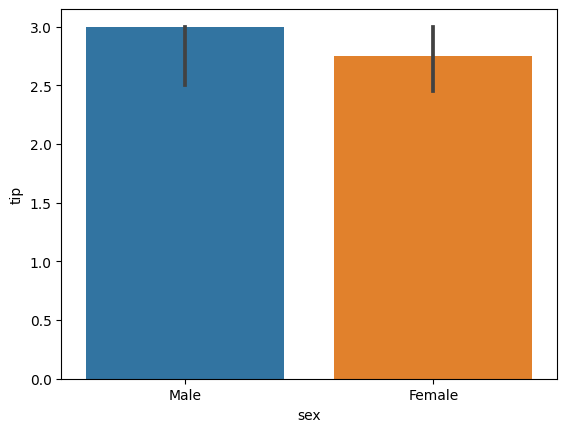

In [83]:
sns.barplot(
    data = tips,
    x = 'sex',
    y = 'tip',
    # estimator = np.median
    estimator = 'median'
)

# estimator = 'mean': 기본값, 평균 계산.

plt.show()

In [86]:
tips.groupby('smoker').tip.mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

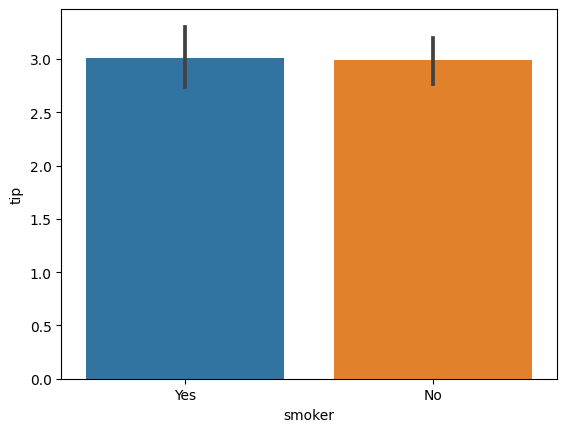

In [89]:
# 흡연여부별 tip의 평균을 시각화
sns.barplot(
    data = tips,
    x = 'smoker',
    y = 'tip'
)

plt.show()

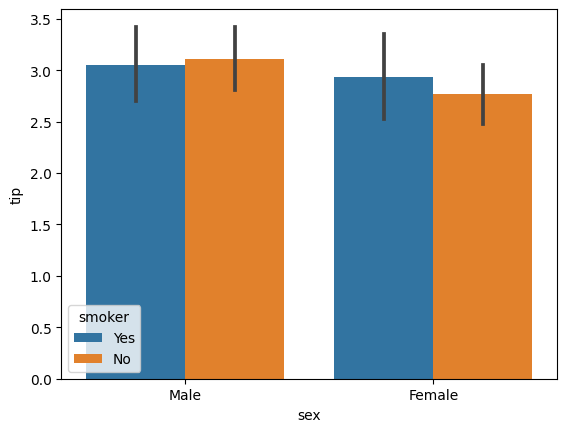

In [88]:
# 성별 흡연여부별 tip의 평균을 시각화
sns.barplot(
    data = tips,
    x = 'sex',
    y = 'tip',
    hue = 'smoker'
)

plt.show()

# 산점도: `scatterplot()`

* tip ~ total_bill 산점도

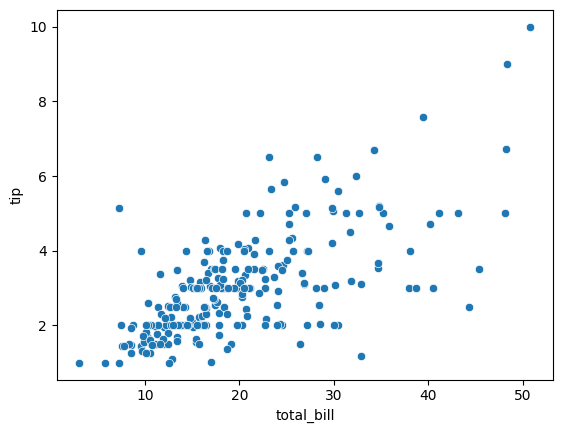

In [91]:
sns.scatterplot(
    data = tips,
    x = 'total_bill',
    y = 'tip'
)

plt.show()

* tip ~ total_bill
* 성별에 따라서 점의 색깔이 다르게 표현

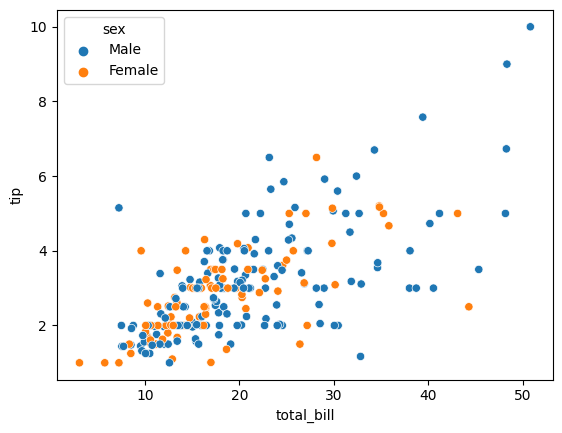

In [93]:
sns.scatterplot(
    data = tips,
    x = 'total_bill',
    y = 'tip',
    hue = 'sex'
)

plt.show()

* tip ~ total_bill
* 성별에 따라서 점의 색깔을 다르게.
* 흡연 여부에 따라서 점의 모양을 다르게.

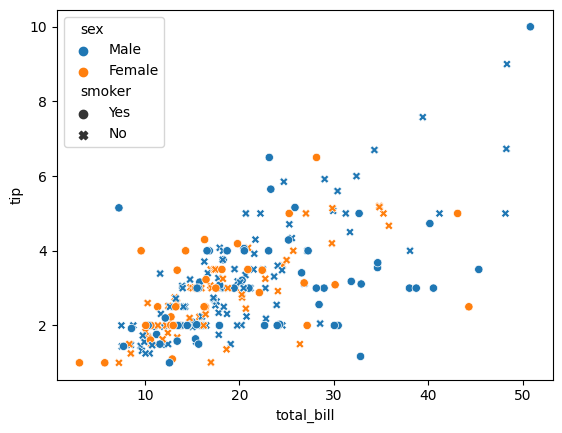

In [100]:
sns.scatterplot(
    data = tips,
    x = 'total_bill',
    y = 'tip',
    hue = 'sex',
    style = 'smoker'
)

plt.show()

* tip ~ total_bill
* 성별에 따라서 점의 색깔을 다르게.
* 흡연 여부에 따라서 점의 모양을 다르게.
* 점의 크기를 인원수에 따라서 다르게 표현

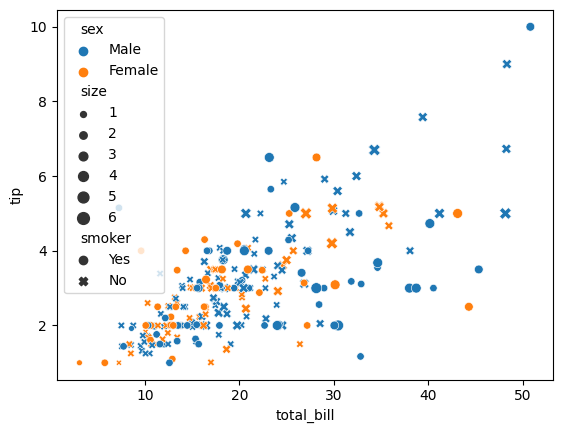

In [98]:
sns.scatterplot(
    data = tips,
    x = 'total_bill',
    y = 'tip',
    hue = 'sex',
    style = 'smoker',
    size = 'size'
)

plt.show()

# 카테고리 그래프: `catplot()`

카테고리 별로 subplot들을 생성하고 통계값(평균, 중앙값, ...) 계산해서, 각각의 subplot에 같은 종류의 그래프들을 시각화.

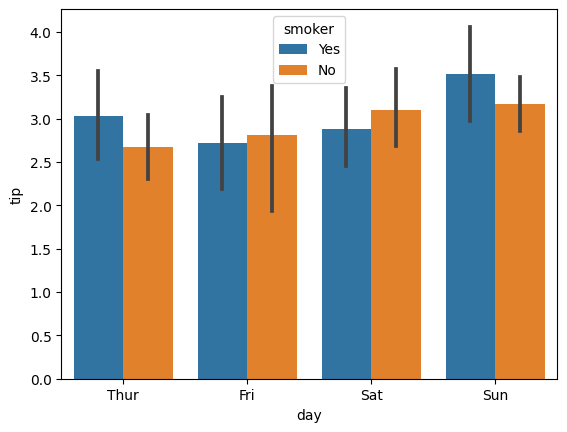

In [101]:
# 요일별, 흡연여부별 팁의 평균을 막대 그래프로 표현
sns.barplot(
    data = tips,
    x = 'day',
    y = 'tip',
    hue = 'smoker'
)

plt.show()

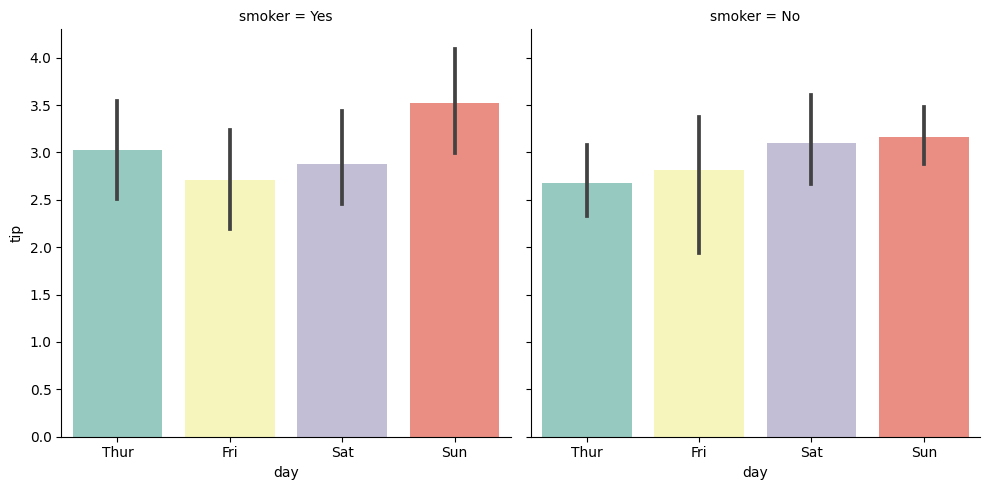

In [109]:
sns.catplot(
    data = tips,
    x = 'day',
    y = 'tip',
    col = 'smoker',
    estimator = 'mean',
    kind = 'bar',
    palette = 'Set3'
)

plt.show()

* 요일별 팁의 평균 막대 그래프
* 시간(Lunch, Dinner) 별로 subplot을 생성.

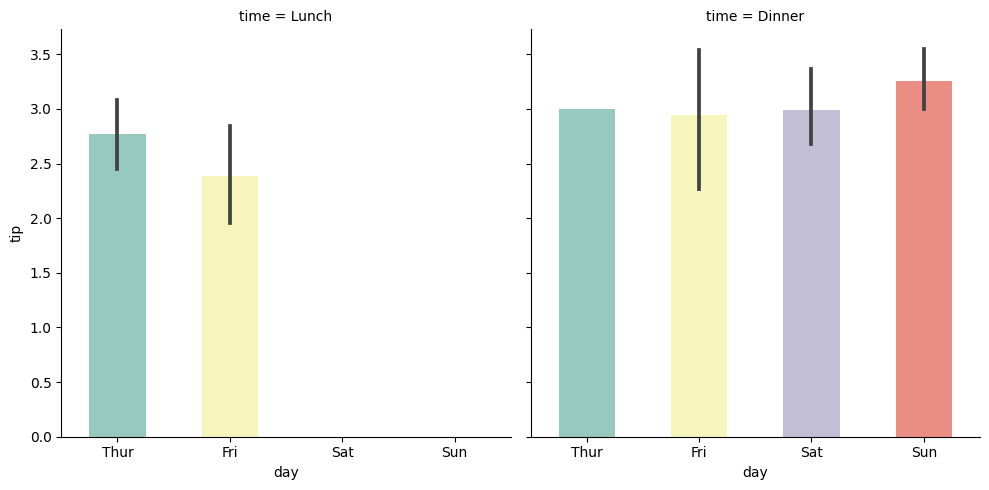

In [128]:
sns.catplot(
    data = tips,
    x = 'day',
    y = 'tip',
    col = 'time',
    kind = 'bar',
    palette = 'Set3',
    width = 0.5
)

plt.show()

* 요일별 팁의 평균 막대 그래프
* 흡연여부별로 subplot
* 시간별 subplot

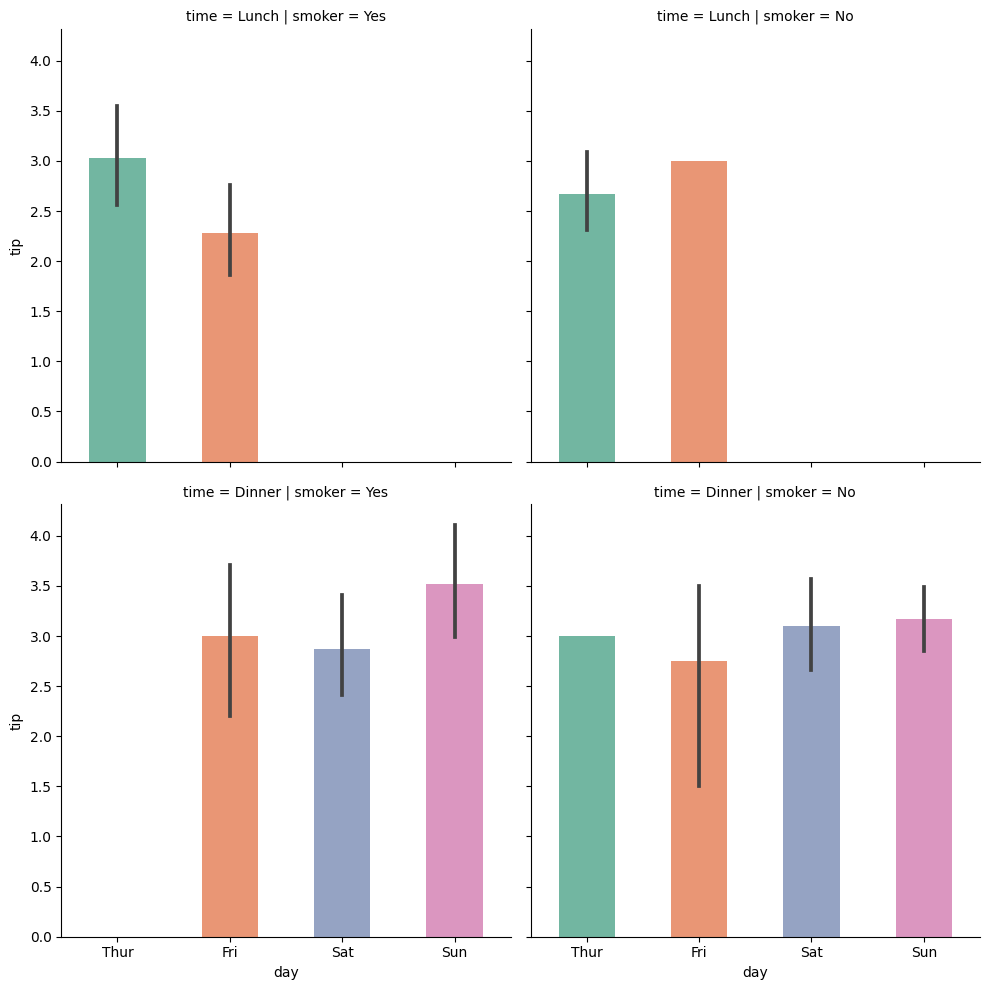

In [127]:
sns.catplot(
    data = tips,
    x = 'day',
    y = 'tip',
    col = 'smoker',
    row = 'time',
    kind = 'bar',
    palette = 'Set2',
    width = 0.5
)

plt.show()

* 요일별 성별 팁의 막대 그래프
* 시간별 subplot

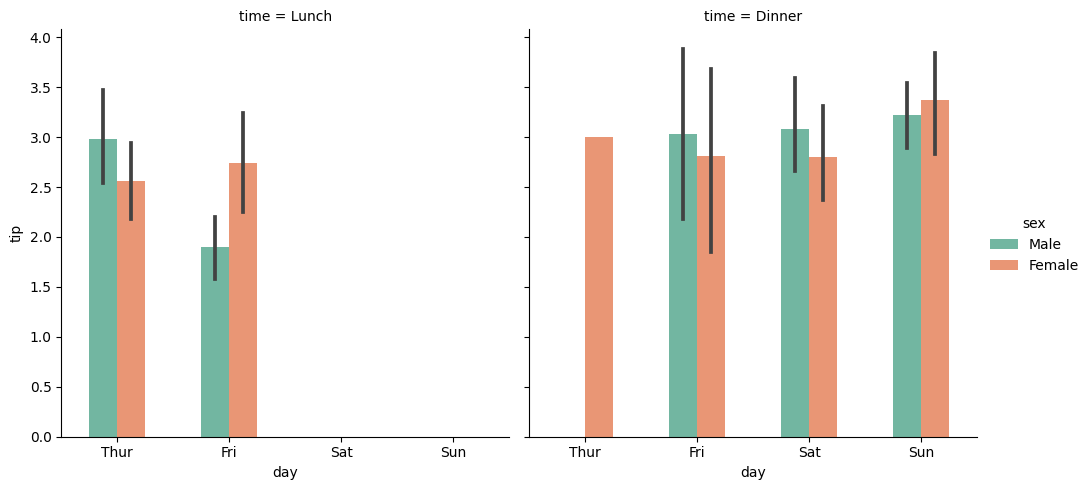

In [126]:
sns.catplot(
    data = tips,
    x = 'day',
    y = 'tip',
    hue = 'sex',
    col = 'time',
    kind = 'bar',
    palette = 'Set2',
    width = 0.5
)

plt.show()

* 성별 팁의 box plot
* 요일별로 subplot

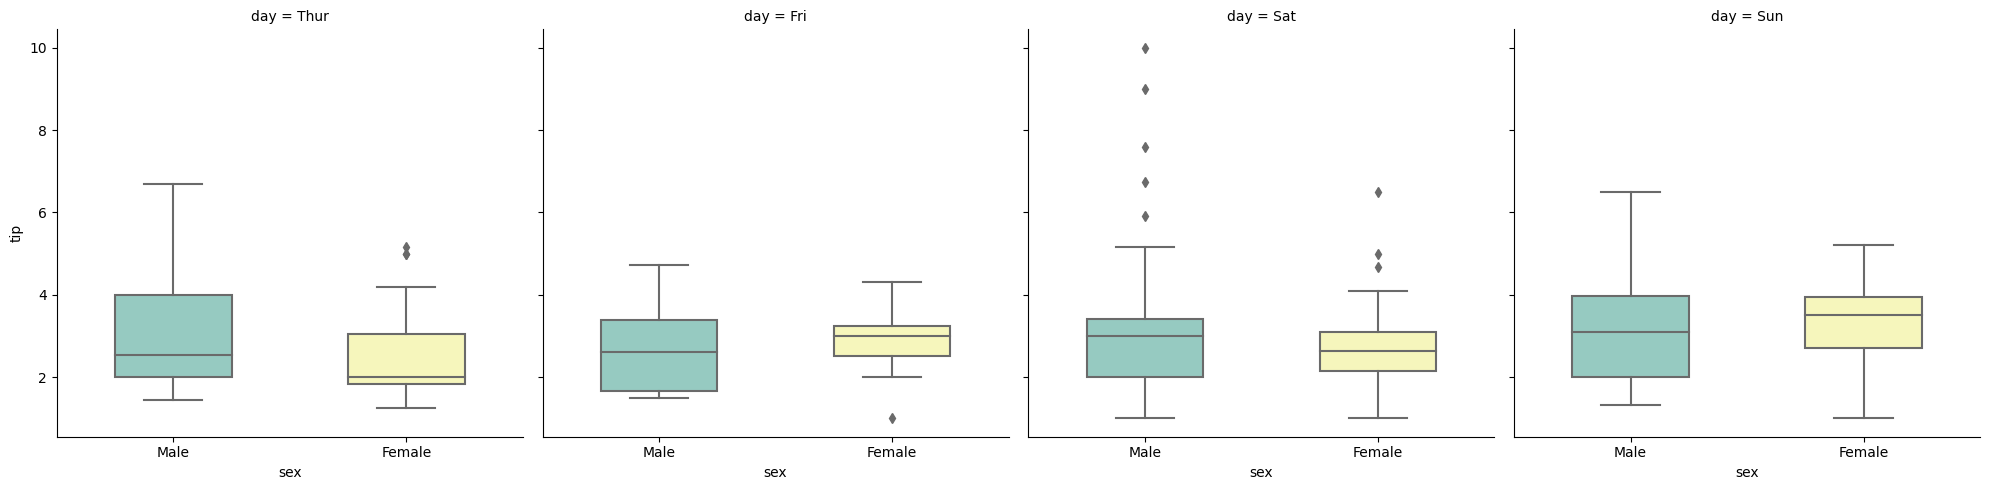

In [124]:
sns.catplot(
    data = tips,
    x = 'sex',
    y = 'tip',
    col = 'day',
    kind = 'box',
    palette = 'Set3',
    width = 0.5
)

plt.show()